In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('coke.txt', header=None)

In [8]:
df.head(3)

,0
0,20.027288
1,21.031513
2,20.705451


In [10]:
weights = df[0]

In [20]:
m = weights.mean()

In [21]:
s = weights.std(ddof=0)

In [22]:
# h0 = 20.4
# h1 = !20.4

In [25]:
se = s / (len(weights) ** 0.5)

In [27]:
m, s, se

(20.519861441022602, 0.95768221510418849, 0.083994286670484794)

In [28]:
import scipy.stats as scs

In [35]:
def plot_dist(m, se, c, label, plot=True):
    rv = scs.norm(m, se)   # random variable
    xrange = np.linspace(m - (4*se), m + (4*se), 1000) # an array of floating points, the x values
    y = rv.pdf(xrange) # generating y values for a normal distribution across the xrange
    if plot:
        plt.plot(xrange, y, c=c, label=label) # plot of the curve
        plt.axvline(x=m, c='k', linestyle='--') # plotting the mean value, black color
    return rv # returning the random variable

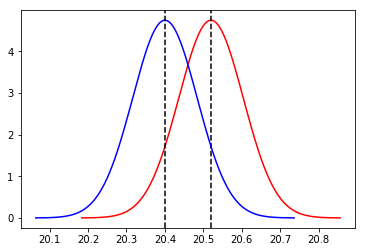

In [36]:
plot_dist(m, se, c='r', label='H1')
plot_dist(20.4, se, c='b', label='H0')

In [42]:
sem = scs.sem(weights)
bounds = np.linspace(20.4-(4*sem), m+(4*sem), 100) # width of the plot
reject_low = 20.4 - 1.96*sem
reject_high = 20.4 + 1.96*sem
ci_low = m-(1.96*sem) # confidence interval
ci_high = m+(1.96*sem)

In [46]:
def plot_part0(bounds, m, sem, reject_low, reject_high, ci_low, ci_high):
    y_s = scs.norm.pdf(bounds, loc=m, scale=sem)
    y_h0 = scs.norm.pdf(bounds, loc=20.4, scale=sem)
    plt.plot(bounds, y_s,label='sample')
    plt.plot(bounds, y_h0, label='h0')
    plt.axvline(x=reject_low, c='b', linestyle='--', label='rejection')
    plt.axvline(x=reject_high, c='b', linestyle='--')
    plt.axvline(x=ci_low, c='r', linestyle='--', label='95%')
    plt.axvline(x=ci_high, c='r', linestyle='--')
    plt.ylabel('probability')
    plt.xlabel('weights')
    plt.legend()

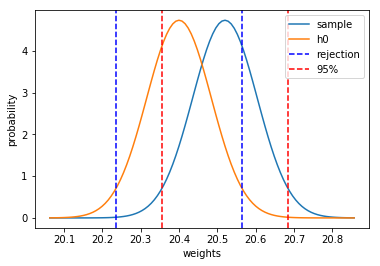

In [47]:
plot_part0(bounds, m, sem, reject_low, reject_high, ci_low, ci_high)

In [52]:
def plot_ci(m, sem, c, plot=True, ci=0.95):
    z = scs.norm.ppf(ci+(1-ci)/2)
    lower_ci = m - z*sem
    upper_ci = m + z*sem
    rv = scs.norm(m, sem)
    xrange = np.linspace(m - (4*sem), m + (4*sem), 1000)
    y = rv.pdf(xrange)
    if plot:
        plt.plot(xrange, y, c=c)
        plt.axvline(x=lower_ci, c=c, linestyle='--', alpha=0.3)
        plt.axvline(x=upper_ci, c=c, linestyle='--', alpha=0.3)

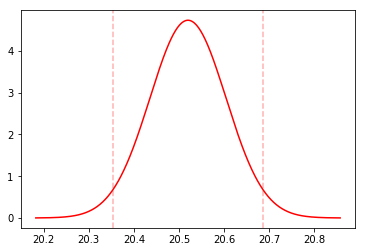

In [53]:
plot_ci(m, sem, 'r')

In [65]:
def calc_power(data, null_mean, ci=0.95):
    m = data.mean()
    se = data.std(ddof=0) / (len(data) ** 0.5)
    rv = scs.norm(null_mean, se)
    srv = scs.norm(m, se)
    z1 = rv.ppf(ci + (1-ci)/2)
    z2 = rv.ppf((1-ci)/2)
    return 1 - srv.cdf(z1) + srv.cdf(z2)

In [66]:
calc_power(weights, 20.4)

0.29738915298674196

In [70]:
def explore_power(data, null_mean, ci=0.95):
    m = np.mean(data)
    se = np.std(data, ddof=1) / np.sqrt(len(data))
    null_norm = scs.norm(null_mean, se)
    data_norm = scs.norm(m, se)
    reject_low = null_norm.ppf((1-ci) / 2)
    reject_high = null_norm.ppf(ci + (1-ci) / 2)
    power_lower = data_norm.cdf(reject_low)
    power_higher = 1 - data_norm.cdf(reject_high)
    return power_lower + power_higher

In [71]:
explore_power(weights, 20.4)

0.29549570806326148

In [72]:
explore_power(weights, 20.2)

0.96663546292686098

In [80]:
xs = np.linspace(20, 21, 10)
ys = [explore_power(weights, x) for x in xs]

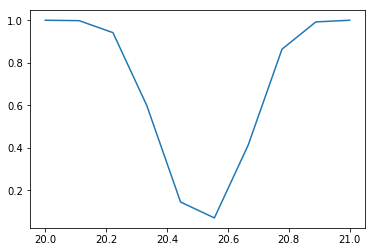

In [81]:
plt.plot(xs, ys)